In [1]:
import numpy as np

from astropy.io import ascii

import tracepol

import matplotlib.pyplot as plt

from astropy.table import Table

# This notebook generates extrapolated points to the Optics model. That way, trace solutions will behave better outside of their wavelength range.

# Here is what we mean by the bad trace behavior outside their wavelength range modelled in the Optics model spreadsheet. Order 1 for example diverges badly after 3.0 microns. Here, the tracepol.wavelength2xy was when only the optics model points are considered. The bahavior should look much better with the improved tracepol that includes extrapoleted points.

m, order max =  -1 10


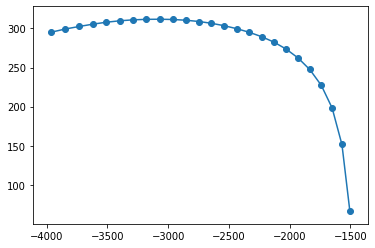

m, order max =  0 12


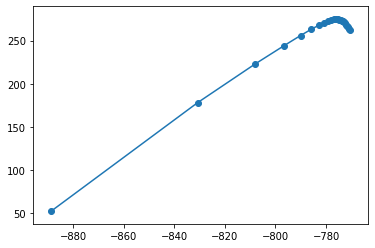

/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)


m, order max =  1 10


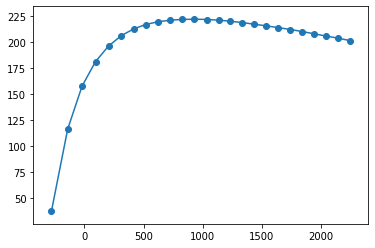

m, order max =  2 6


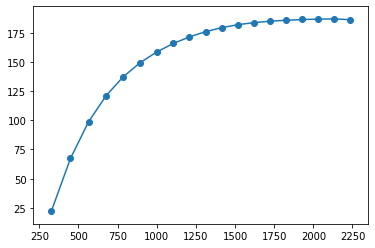

m, order max =  3 4


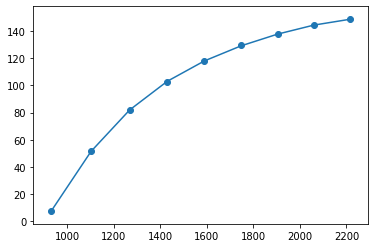

Text(0.5, 1.0, 'Trace Solution for Order 1 between 0.5 and 4.0 microns')

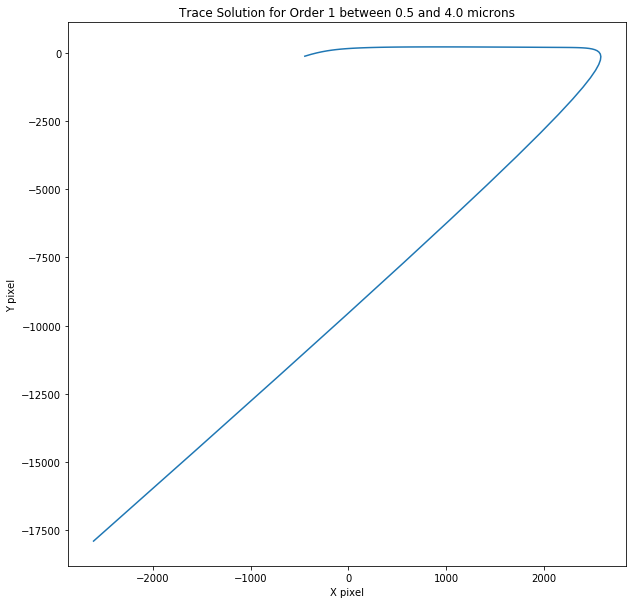

In [2]:
tracepars = tracepol.get_tracepars(filename='NIRISS_GR700_trace.csv')

lba = np.linspace(0.5,4.0,100)
x, y, mask = tracepol.wavelength2xy(lba,tracepars,m=1)
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.xlabel('X pixel')
plt.ylabel('Y pixel')
plt.title('Trace Solution for Order 1 between 0.5 and 4.0 microns')
#plt.savefig('tracesolution_order1_before.pdf')

# The same is true for Order 2

Text(0.5, 1.0, 'Trace Solution for Order 2 between 0.5 and 4.0 microns')

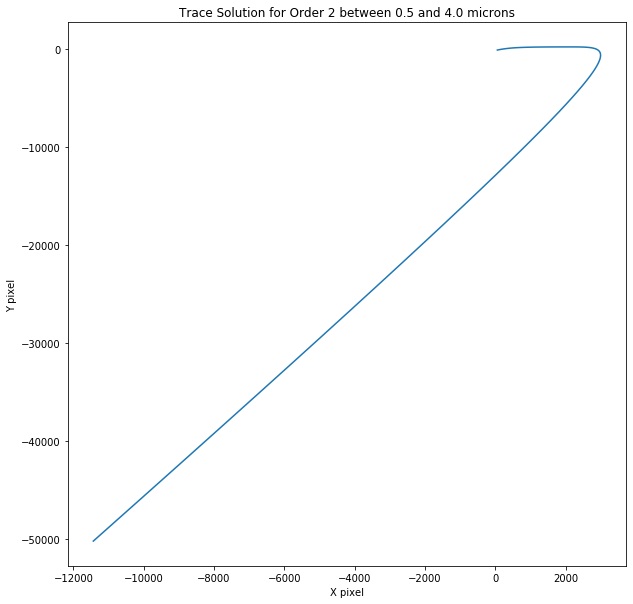

In [3]:
lba = np.linspace(0.5,2.8,100)
x, y, mask = tracepol.wavelength2xy(lba,tracepars,m=2)
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.xlabel('X pixel')
plt.ylabel('Y pixel')
plt.title('Trace Solution for Order 2 between 0.5 and 4.0 microns')
#plt.savefig('tracesolution_order2_before.pdf')

# Here, the extrapolation happens.

# The key concept here is that a cross-dispersed grism has two axis, orthogonal to each other: the spectral axis whose dispersion is produced by the grating and the spatial axis whose small dispersion is produced by the cross-dispersed prism's varying index of refraction with wavelength. Along the spectral axis (Y pixels), the dispersion in micron/pixel is almost constant for a given order. We will use a linear fit to fit the dispersion to allow extrapolation in the spectral direction. Along the spatial axis, we will use the optics model x-component function of wavelength and assume that orders 1 to 3 behave similarly. For order -1, the spatial dispersion of the optics model folds weirdly and we will just apply a linear extrpolation.
# But, before we can fit those dispersions, we need to determine the small field rotation (designed in the GR700XD cell) and de-rotate (to zero degrees) the x,y positions to xr,yr. Then we do the fits, generate extrapolated data points and rotate backj to the initial rotation. Saving in the original mm rather than pixel positions.

0.6 [ -41.13693426 1250.43941567] -41.13693425708507
0.7 [ -40.53476496 4574.60369612] -40.53476495995177
0.8 [ -40.30149779 6329.74742946] -40.30149779348498
0.9 [ -40.55337143 7461.67261726] -40.55337143194723
1.0 [ -40.71819816 8229.88348968] -40.718198155934154
1.2 [ -40.38275113 9023.85144659] -40.38275113149338
1.4 [ -41.14048489 9691.66151813] -41.140484894141565
1.6 [  -41.67984348 10102.74410275] -41.6798434762641
1.8 [ -39.20634711 9714.17413928] -39.206347111404284
2.0 [ -39.50173621 9914.21201536] -39.50173620560164
2.2 [  -39.81175731 10076.9091469 ] -39.8117573109042
2.4 [  -40.13126637 10213.2317158 ] -40.131266369102526
2.6 [  -40.45414206 10329.1115787 ] -40.4541420626202
2.8 [  -40.77702882 10428.4353158 ] -40.7770288184206
3.0 [  -41.09227956 10512.35847713] -41.09227955900465
slope average =  -40.494826902490686


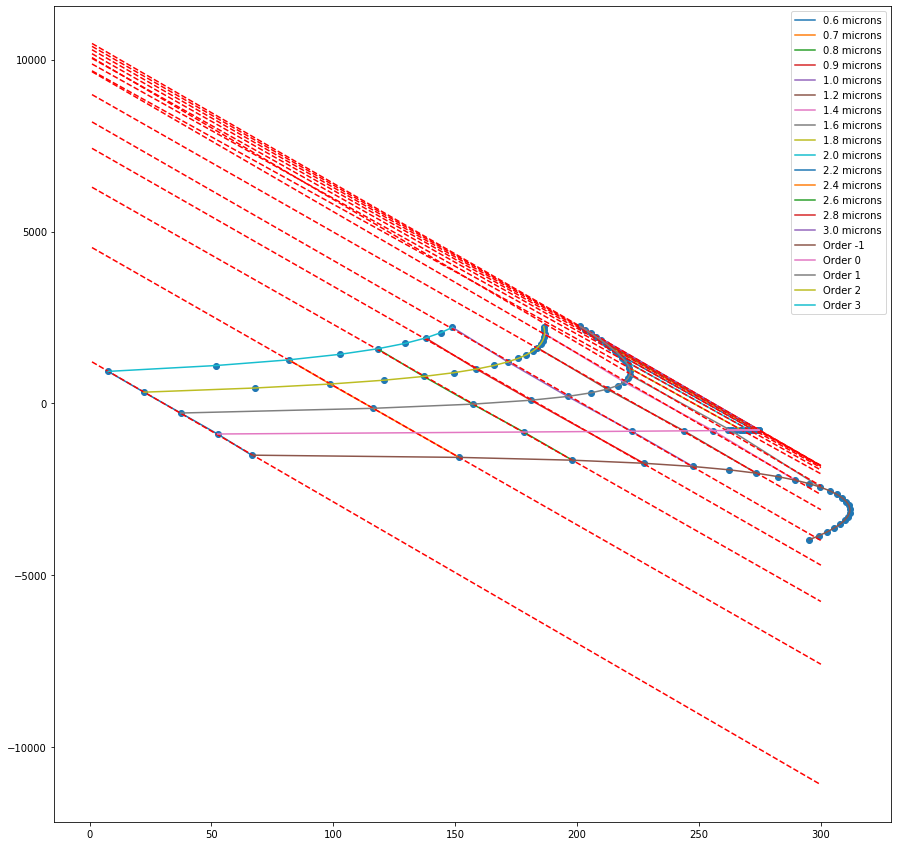

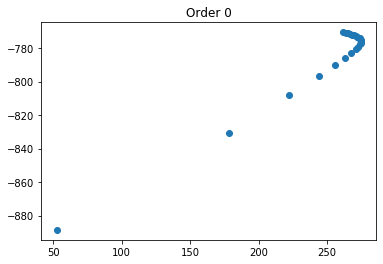

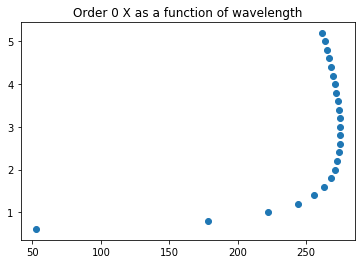

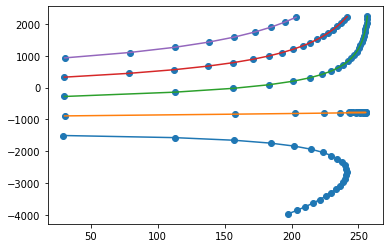

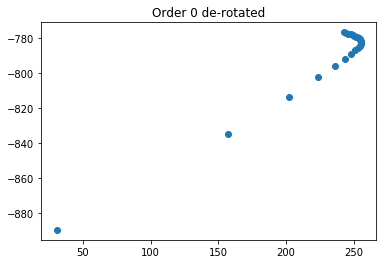

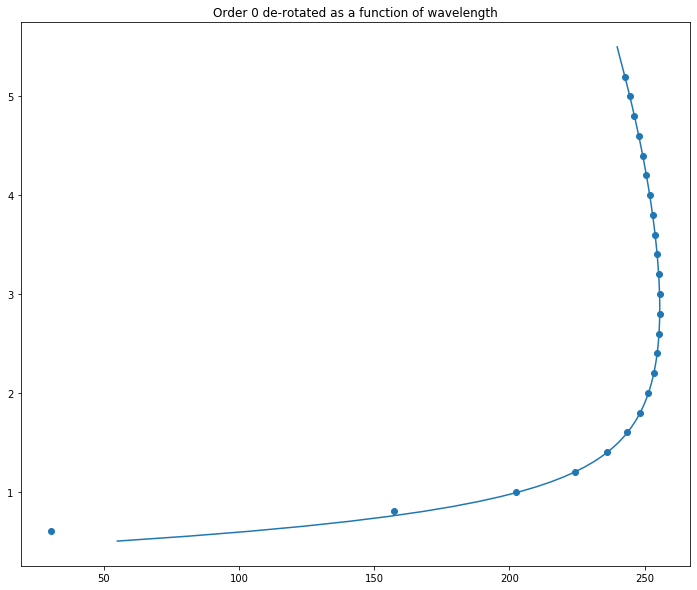

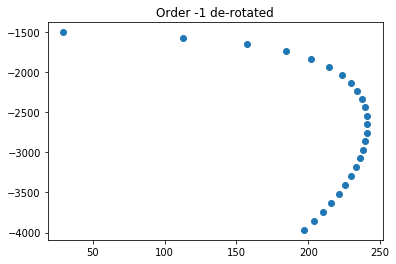

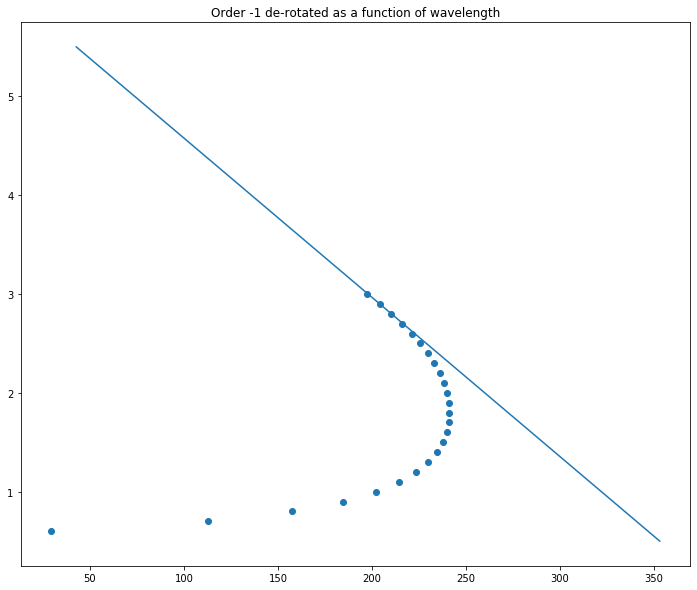

Fit Slope = -1127.63719545533 pixels/micron
Fit Y-intercept (before) = -583.6587656082684
Last data lambda = 3.0, yr_model = -3966.5703519742583, yr_lastdata = -3967.5077225279924
Fit Y-intercept (after) = -584.5961361620025



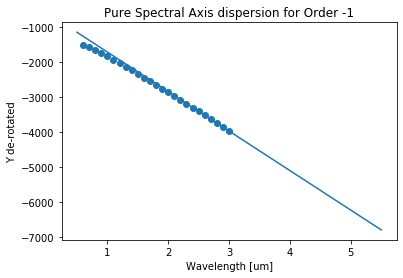

Fit Slope = 2.0284030510942226 pixels/micron
Fit Y-intercept (before) = -787.3695350987588
Last data lambda = 5.2, yr_model = -776.8218392330688, yr_lastdata = -776.822684281437
Fit Y-intercept (after) = -787.370380147127



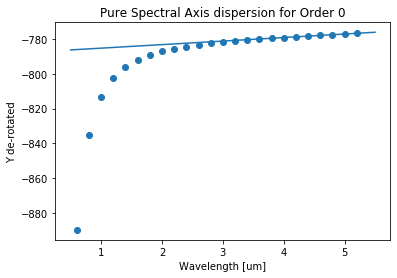

Fit Slope = 1010.4229261046899 pixels/micron
Fit Y-intercept (before) = -791.2349709435226
Last data lambda = 3.0, yr_model = 2240.033807370547, yr_lastdata = 2240.1053496876593
Fit Y-intercept (after) = -791.1634286264103



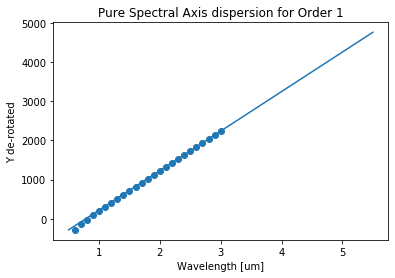

Fit Slope = 2037.2755439054802 pixels/micron
Fit Y-intercept (before) = -827.1461535928865
Last data lambda = 1.5, yr_model = 2228.767162265334, yr_lastdata = 2228.6758425200114
Fit Y-intercept (after) = -827.2374733382089



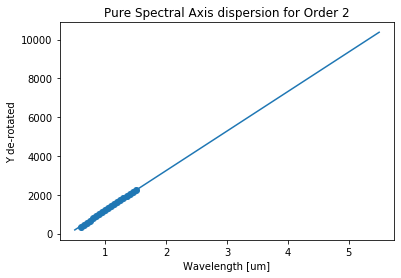

Fit Slope = 3117.3578104655844 pixels/micron
Fit Y-intercept (before) = -905.8537892956206
Last data lambda = 1.0, yr_model = 2211.504021169964, yr_lastdata = 2210.382964230878
Fit Y-intercept (after) = -906.9748462347065



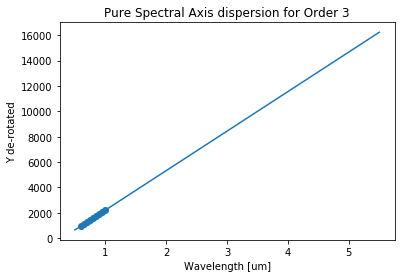

[-1.12763720e+03  2.02840305e+00  1.01042293e+03  2.03727554e+03
  3.11735781e+03]
Order -1, extrapolation wavelengths requested: [3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7
 4.8 4.9 5. ]
[ 29.33902777 112.85769617 157.25814936 184.33565547 202.19520984
 214.55848833 223.36815255 229.72770858 234.30233184 237.50983794
 239.62012435 240.81245076 241.20481285 240.87633605 239.87801989
 238.2451485  235.99848369 233.15266429 229.71860602 225.70407058
 221.11938406 215.97696392 210.29195658 204.08741424 197.39101744]
[197.88287191 191.67832958 185.47378725 179.26924492 173.06470259
 166.86016026 160.65561793 154.4510756  148.24653327 142.04199093
 135.8374486  129.63290627 123.42836394 117.22382161 111.01927928
 104.81473695  98.61019462  92.40565229  86.20110996  79.99656762
  73.79202529]
x-axis anchor offset = -0.49185447051323195
Order 0, extrapolation wavelengths requested: []
Order 1, extrapolation wavelengths requested: [3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3

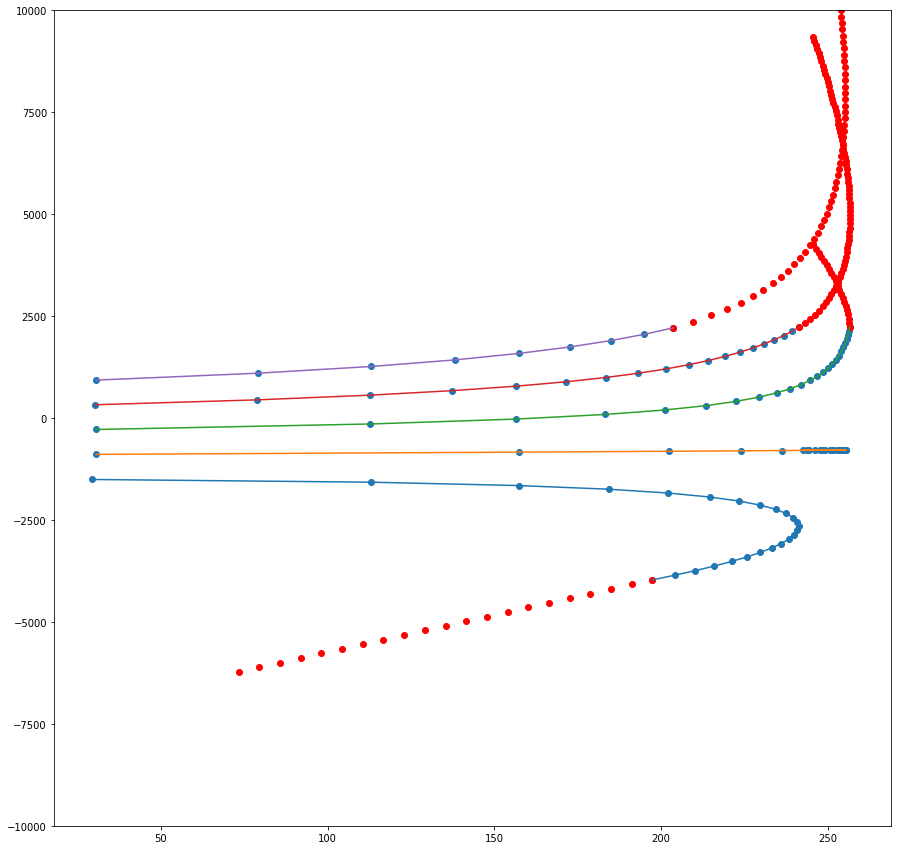

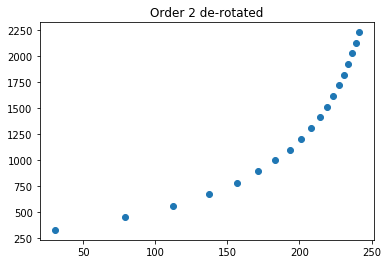

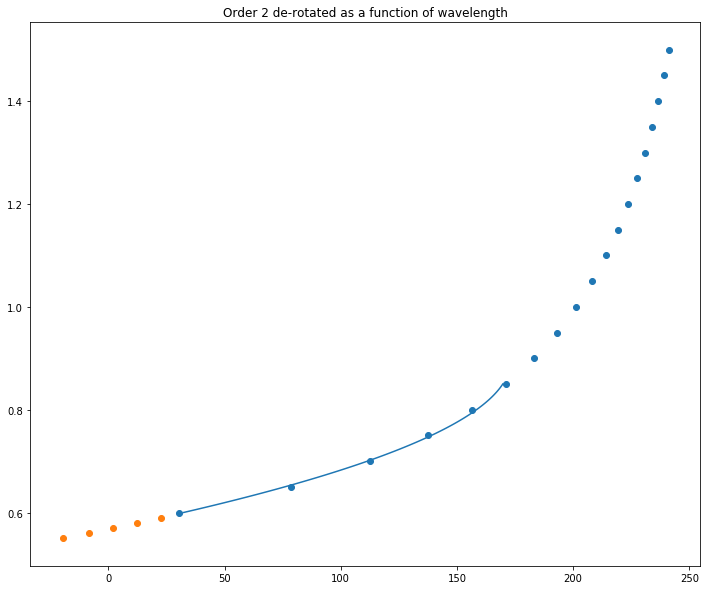

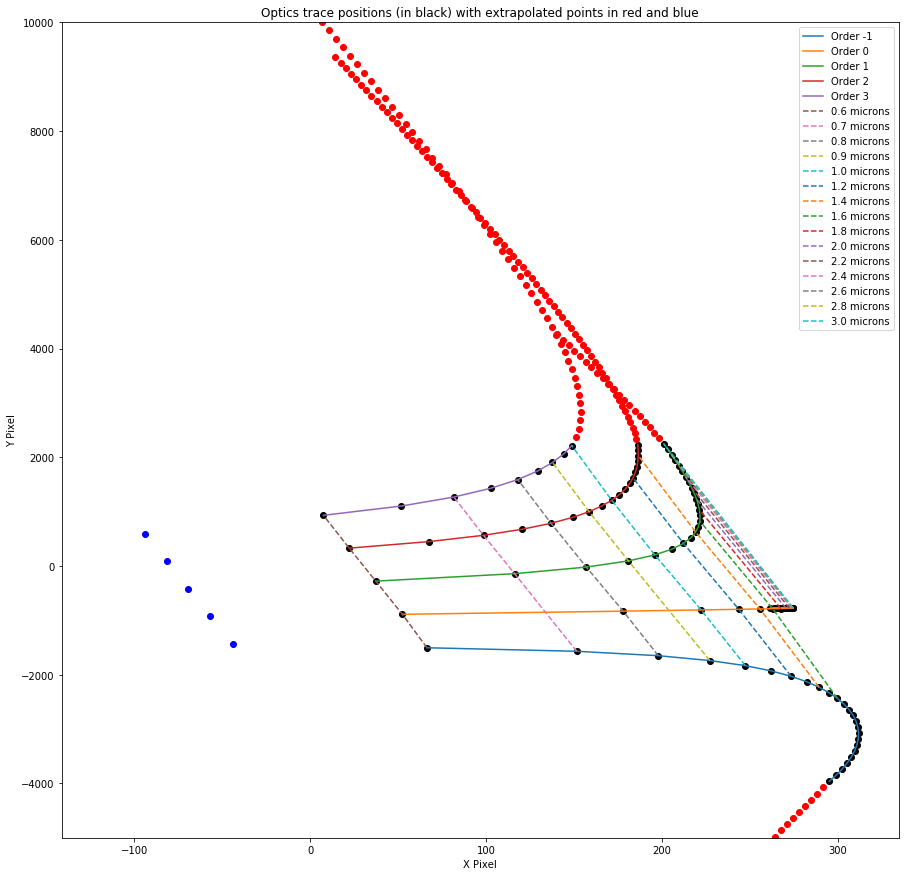

In [4]:
# The optics model csv is read (positions are initially in mm)
trace = ascii.read('NIRISS_GR700_trace.csv')

# The set of original x, y, wavelength
x = np.array(trace['xpos'] / 0.018) # convert to pixels from mm
y = np.array(trace['ypos'] / 0.018) # convert to pixels from mm
w = np.array(trace['Wavelength'])
m_orig = np.array(trace['order'])

# Plot the initial trace positions
plt.figure(figsize=(15,15))
lba_match = np.array([0.6,0.7,0.8,0.9,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0])

# Towards determinign the field rotation, find the slopes.
# Find the mean slope of constant lambda
xfit = np.linspace(1,300,300)
slope = np.zeros(np.size(lba_match))
for i in range(np.size(lba_match)):
    lba = lba_match[i]
    ind = (trace['Wavelength'] == lba) & ((trace['order'] != -1) | (trace['Wavelength'] <= 1.6))
    plt.plot(x[ind],y[ind],label=str(lba)+' microns')
    # fit a straight line through orders at same wavelength
    z = np.polyfit(x[ind],y[ind],1)
    print(lba, z, z[0])
    slope[i] = z[0]*1
    yfit = np.polyval(z,xfit)
    plt.plot(xfit,yfit,color='red',linestyle='dashed')
    i = i+1
slopeavg = np.mean(slope)
print('slope average = ',slopeavg)

# Overplot the order lines
for m in [-1,0,1,2,3]:
    ind = trace['order'] == m
    plt.plot(x[ind],y[ind],label='Order '+str(m))
plt.scatter(x,y)
#plt.axis('equal')
plt.legend()
plt.show()

# Out of curiosity, look more closely at the behavior of order 0
m0 = trace['order'] == 0
plt.scatter(x[m0],y[m0])
plt.title('Order 0')
plt.show()
plt.scatter(x[m0],w[m0])
plt.title('Order 0 X as a function of wavelength')
plt.show()



# NOW, Rotate by the slope average to produce the optics model points
# in the derotated frame, xr, yr.
theta = -(np.pi/2 + np.arctan(slopeavg))
xr = x * np.cos(theta) - y * np.sin(theta)
yr = x * np.sin(theta) + y * np.cos(theta)
plt.scatter(xr,yr)
for m in [-1,0,1,2,3]:
    ind = trace['order'] == m
    plt.plot(xr[ind],yr[ind],label='Order '+str(m))
plt.show()


# Spatial dispersion first:
wfit = np.linspace(0.5,5.5,101)
# Use the order 0 xr position versus wavelength to extrapolate for all orders (except -1)
ind = trace['order'] == 0
plt.scatter(xr[ind],yr[ind])
plt.title('Order 0 de-rotated')
plt.show()
plt.figure(figsize=(12,10))
plt.scatter(xr[ind],w[ind])
plt.title('Order 0 de-rotated as a function of wavelength')
# Here make the high order fit
# reject the bluest points
xr_vs_lba = np.polyfit(w[ind][4:],xr[ind][4:],11)
xrfit = np.polyval(xr_vs_lba,wfit)
plt.plot(xrfit,wfit)
plt.show()

# Spatial dispersion for order -1
# For order -1, generate own spatial dispersion solution
ind = trace['order'] == -1
plt.scatter(xr[ind],yr[ind])
plt.title('Order -1 de-rotated')
plt.show()
plt.figure(figsize=(12,10))
plt.scatter(xr[ind],w[ind])
plt.title('Order -1 de-rotated as a function of wavelength')
# Here make a linear fit of the last 3 or so data points
xr_vs_lba_minusone = np.polyfit(w[ind][-3:-1],xr[ind][-3:-1],1)
xrfit = np.polyval(xr_vs_lba_minusone,wfit)
plt.plot(xrfit,wfit)
plt.show()

# NOW, the *** Spectral *** dispersion fits.
# Then fit the dispersion for each order
spectral_dispersion = np.zeros(np.size([-1,0,1,2,3])) # pixels/micron

orders = [-1,0,1,2,3]
for i in range(np.size(orders)):
    m = orders[i]
    ind = trace['order'] == m
    plt.scatter(w[ind],yr[ind])
    plt.title('Pure Spectral Axis dispersion for Order {:}'.format(m))
    plt.xlabel('Wavelength [um]')
    plt.ylabel('Y de-rotated')
    # Fit a straight line through the reddest points to prepare for extrapolation
    aaa = np.array(w[ind])
    bbb = np.array(yr[ind])
    z = np.polyfit(aaa[-4:-1],bbb[-4:-1],1)
    spectral_dispersion[i] = np.copy(z[0])
    print('Fit Slope = {:} pixels/micron'.format(z[0]))
    yrfit = np.polyval(z,wfit)
    plt.plot(wfit,yrfit)
    # Adjust the y-intercept to anchor the fitted line on the last (reddest) data point
    yr_model = np.polyval(z,w[ind][-1])
    yr_lastdata = yr[ind][-1]
    dyr = yr_lastdata - yr_model
    print('Fit Y-intercept (before) = {:}'.format(z[1]))
    print('Last data lambda = {:}, yr_model = {:}, yr_lastdata = {:}'.format(w[ind][-1],yr_model,yr_lastdata))
    z[1] = z[1] + dyr
    print('Fit Y-intercept (after) = {:}'.format(z[1]))
    print()
    plt.show()
    
print(spectral_dispersion)



# Now, having the spectral dispersion (spectral_dispersion) AND 
# the spatial dispersion (xr_vs_lba), we can generate extrapolation
# data points.
plt.figure(figsize=(15,15))
plt.scatter(xr,yr)

x_extra = []
y_extra = []
wave_extra = []
m_extra = []

orders = [-1,0,1,2,3]
for i in range(np.size(orders)):
    m = orders[i]
    ind = trace['order'] == m
    w_max = w[ind][-1] # maximum wavelength covered for that order already
    yr_max = yr[ind][-1] # maximum y position in optics model for that order
    w_steps = w[ind][-1] - w[ind][-2] # wavelength steps in optics model for that order
    # w_extra are the wavelengths for the extrapolated points
    w_extra = np.arange(w_max,5.05,w_steps)
    print('Order {:}, extrapolation wavelengths requested: {:}'.format(m,w_extra))
    yr_extra = yr_max + spectral_dispersion[i]*(w_extra-w_max)
    if m == -1:
        # For order -1, the spatial dispersion is a straight line
        xr_extra = np.polyval(xr_vs_lba_minusone,w_extra)
    else:
        # For other orders, we adopt the high order polynomial fitted to order 0
        xr_extra = np.polyval(xr_vs_lba,w_extra)
    # Anchor the x-axis extrapolated point on the last x-axis point
    # this "if" is because no extrapolated point is requestef for order 0
    if np.size(xr_extra) >= 1: 
        print(xr[ind])
        print(xr_extra)
        dxr = xr[ind][-1] - xr_extra[0]
        xr_extra = xr_extra + dxr
        print('x-axis anchor offset = {:}'.format(dxr))
    
    plt.plot(xr[ind],yr[ind],label='Order '+str(m))
    plt.scatter(xr_extra,yr_extra,color='r')
    # Derotate back and remove the first extrapolated point which 
    # is identical to the last data point.
    xrr = xr_extra * np.cos(-theta) - yr_extra * np.sin(-theta)
    yrr = xr_extra * np.sin(-theta) + yr_extra * np.cos(-theta)    
    
    # append each new point to the lists
    for n in range(np.size(xrr)-1):
        x_extra.append(xrr[n+1])
        y_extra.append(yrr[n+1])
        wave_extra.append(w_extra[n+1])
        m_extra.append(m)

plt.ylim((-10000,10000))
plt.show()

# Convert from a list to numpy arrays
x_extra = np.array(x_extra)
y_extra = np.array(y_extra)
wave_extra = np.array(wave_extra)
m_extra = np.array(m_extra)


# Extrapolate to the blue at 0.5 and 0.55 microns for all orders
# Along the spectral axis (yr), assume that the dispersion is that of
# the first two data points of that order (the 2 bluest points).
# Along the spatial axis (xr), assume that the behavior of order 2
# (by fitting a 3rd order polynomial thru 6 bluest points) can be 
# extended to other orders.

# spatial axis
ind = trace['order'] == 2
plt.scatter(xr[ind],yr[ind])
plt.title('Order 2 de-rotated')
plt.show()
plt.figure(figsize=(12,10))
plt.scatter(xr[ind],w[ind])
plt.title('Order 2 de-rotated as a function of wavelength')
# Here make a 2nd order fit to only the 6 bluest points
# of order 2. Extrapolate xr to the two wavelengths: 
# 0.5 and 0.55 microns
xr_vs_lba_blue = np.polyfit(w[ind][0:6],xr[ind][0:6],2)
wblue = np.array([0.55,0.56,0.57,0.58,0.59])
xrfit_blue = np.polyval(xr_vs_lba_blue,wblue)
plt.scatter(xrfit_blue,wblue)
wall = np.linspace(0.6,w[ind][5],100)
plt.plot(np.polyval(xr_vs_lba_blue,wall),wall)
plt.show()

# spectral axis - those 4 lists will contain the
# blue extrapolated points
x_blue = []
y_blue = []
m_blue = []
w_blue = []
orders = [-1,0,1,2,3]
for i in range(np.size(orders)):
    m = orders[i]
    ind = trace['order'] == m
    # Fit a slope to the two bluest points of each order
    slope = (yr[ind][1]- yr[ind][0]) / (w[ind][1] - w[ind][0])
    dw = w[ind][1] - w[ind][0]
    #wblue = np.array([w[ind][0]-dw,w[ind][0]-2*dw])
    wblue = np.array([0.5])
    newyr = yr[ind][0] + slope*(wblue-0.6)
    xrfit_blue = np.polyval(xr_vs_lba_blue,wblue)
    newxr = xrfit_blue*1.0
    newx = newxr * np.cos(-theta) - newyr * np.sin(-theta)
    newy = newxr * np.sin(-theta) + newyr * np.cos(-theta)
    newm = wblue*0+m
    x_blue.append(newx)
    y_blue.append(newy)
    m_blue.append(newm)
    w_blue.append(wblue)
#Convert to numpy arrays
x_blue = np.array(x_blue)
y_blue = np.array(y_blue)
m_blue = np.array(m_blue)
w_blue = np.array(w_blue)


# Draw the x,y figure again, this time with extrapolated points
plt.figure(figsize=(15,15))
for m in [-1,0,1,2,3]:
    ind = trace['order'] == m
    plt.plot(x[ind],y[ind],label='Order '+str(m))
for i in range(np.size(lba_match)):
    lba = lba_match[i]
    ind = (trace['Wavelength'] == lba) & ((trace['order'] != -1) | (trace['Wavelength'] <= 1.6))
    plt.plot(x[ind],y[ind],label=str(lba)+' microns',linestyle='dashed')
plt.scatter(x,y,color='black')
plt.scatter(x_extra,y_extra,color='r')
plt.scatter(x_blue,y_blue,color='blue')
plt.title('Optics trace positions (in black) with extrapolated points in red and blue')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.ylim(-5000,10000)
plt.legend()
plt.savefig('OpticsModel_Extrapolation.pdf')
plt.show()


# Save on disk with same format as Optics model file
# Create a file for containing the original optics model points + extrapolated points.
data = Table([np.append(w_blue,np.append(w,wave_extra)),\
              np.append(x_blue*0.018,np.append(x*0.018,x_extra*0.018)),\
              np.append(y_blue*0.018,np.append(y*0.018,y_extra*0.018)),\
              np.append(m_blue,np.append(m_orig,m_extra))], \
             names=['Wavelength','xpos','ypos','order'])
ascii.write(data,'NIRISS_GR700_trace_extended.csv', format='csv', overwrite=True)




m, order max =  -1.0 31


/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit 

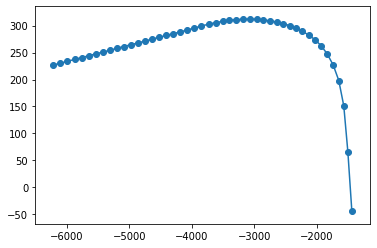

/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)


m, order max =  0.0 15


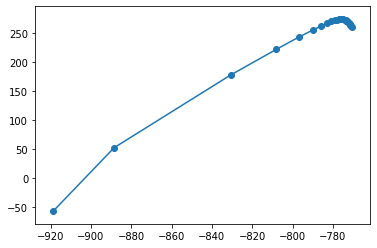

/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit 

m, order max =  1.0 30


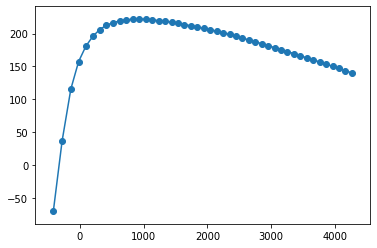

/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit 

m, order max =  2.0 31


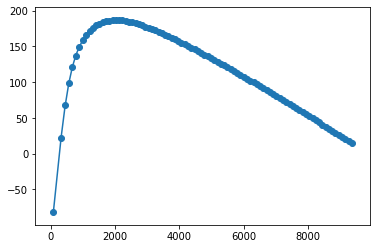

/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit 

m, order max =  3.0 31


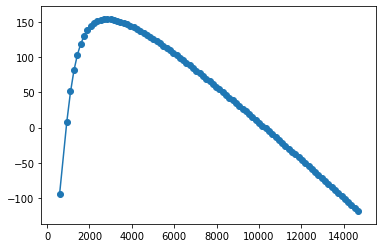

/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)


In [5]:
tracepars = tracepol.get_tracepars(filename='NIRISS_GR700_trace_extended.csv')

/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit 

m, order max =  -1.0 31


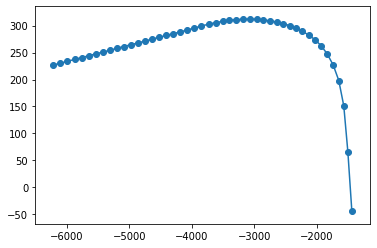

/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)


m, order max =  0.0 15


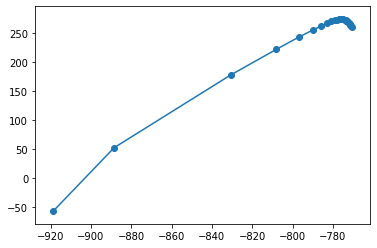

/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit 

m, order max =  1.0 30


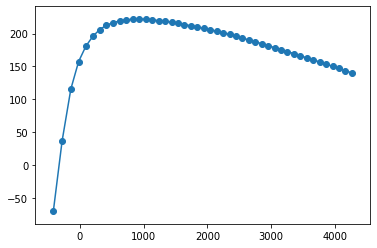

/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit 

m, order max =  2.0 31


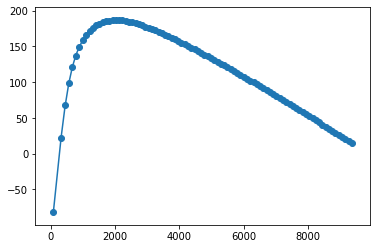

/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit 

m, order max =  3.0 31


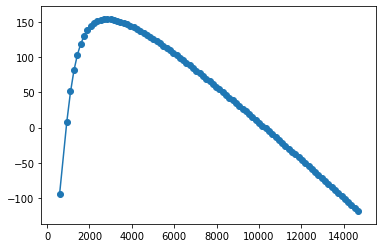

/Users/albert/Space/udm/NIRISS/SOSSpipeline/trace/tracepol.py:100: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)


Text(0.5, 1.0, 'Trace Solution for Order 1 between 0.5 and 4.0 microns')

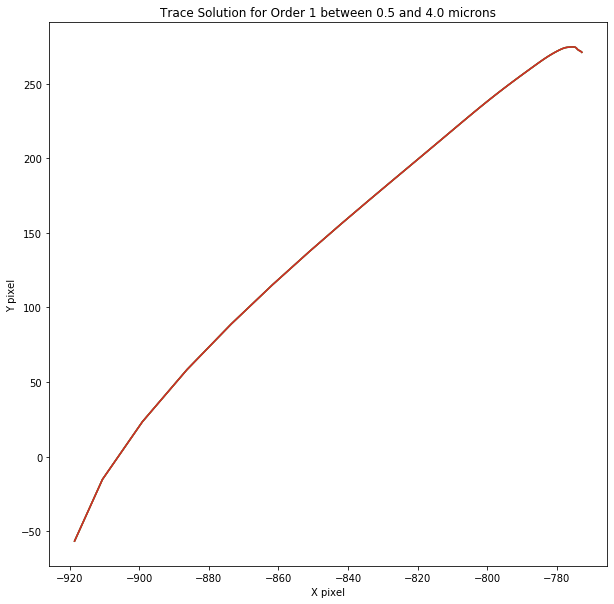

In [6]:
tracepars = tracepol.get_tracepars(filename='NIRISS_GR700_trace_extended.csv')

lba = np.linspace(0.5,4.0,100)
plt.figure(figsize=(10,10))
x, y, mask = tracepol.wavelength2xy(lba,tracepars,m=-1)
#plt.plot(x,y)
x, y, mask = tracepol.wavelength2xy(lba,tracepars,m=0)
plt.plot(x,y)
#x, y, mask = tracepol.wavelength2xy(lba,tracepars,m=1)
plt.plot(x,y)
#x, y, mask = tracepol.wavelength2xy(lba,tracepars,m=2)
plt.plot(x,y)
#x, y, mask = tracepol.wavelength2xy(lba,tracepars,m=3)
plt.plot(x,y)
plt.xlabel('X pixel')
plt.ylabel('Y pixel')
plt.title('Trace Solution for Order 1 between 0.5 and 4.0 microns')
#plt.savefig('tracesolution_order1_before.pdf')

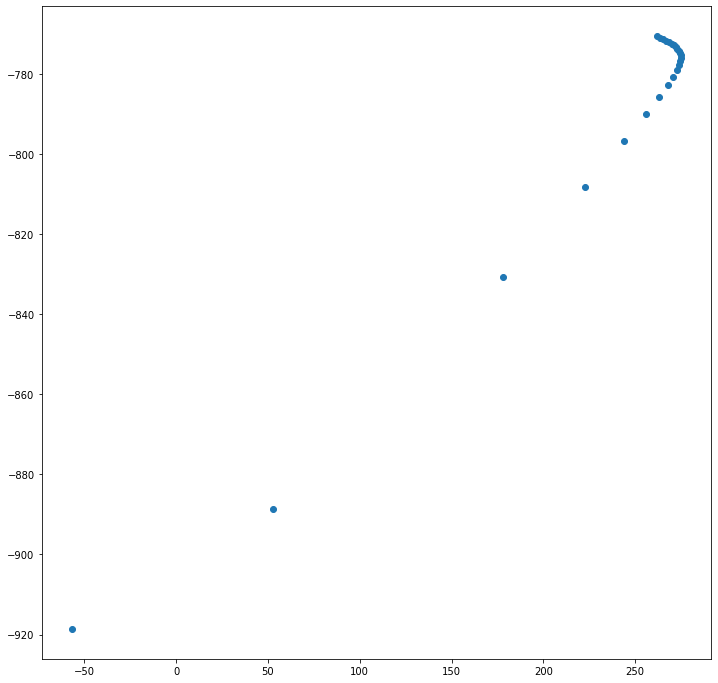

In [8]:
# The set of original x, y, wavelength
trace = ascii.read('NIRISS_GR700_trace_extended.csv')
x = np.array(trace['xpos'] / 0.018) # convert to pixels from mm
y = np.array(trace['ypos'] / 0.018) # convert to pixels from mm
w = np.array(trace['Wavelength'])
m = np.array(trace['order'])

ind = m == 0
plt.figure(figsize=(12,12))
plt.scatter(x[ind],y[ind])
#plt.axis('equal')
plt.show()
